In [5]:
import math
import scipy.special as sc
import numpy as np

In [9]:
def prob_majority(poll_size, choice = -1, runs = 200):
    
    choices = [-1, 0, 1]
    choice_count = 0
    for i in range(0, runs):
        poll = np.random.choice(choices, p = [0.4, 0.25, 0.35], size = poll_size)
        unique, counts = np.unique(poll, return_counts=True)
        max_votes = counts[np.argmax(counts)]
        if(np.count_nonzero(counts == max_votes) == 1):
            choice_count += (unique[np.argmax(counts)] == choice)
    
    return choice_count/runs

In [10]:
print("Probability of -1 majority with a poll size of 10: ", prob_majority(choice = -1, runs = 200, poll_size = 10))
print("Probability of -1 majority with a poll size of 120: ", prob_majority(choice = -1, runs = 200, poll_size = 120))
print("Probability of -1 majority with a poll size of 250: ", prob_majority(choice = -1, runs = 200, poll_size = 250))


Probability of -1 majority with a poll size of 10:  0.485
Probability of -1 majority with a poll size of 120:  0.71
Probability of -1 majority with a poll size of 250:  0.78


In [ ]:
from decimal import Decimal 

# gets the expected probability of majority for a poll of a specified number of samples
def get_prob(samples):
    p_choice = 0.4
    p_one = 0.35
    p_zero = 0.25
    P = 0 # expected probability
    P = Decimal(P) 

    for qc in range(0, samples):
        if(qc > int(samples * 0.5)):
            continue
    
        p_c = Decimal(np.power(p_choice, qc))
        
        for q in range(0, samples - qc + 1):
            qa = q 
            qb = samples - q - qc
            if(qa < qc and qb < qc):
                continue

            counts = Decimal(math.comb(samples - qc, qa) * math.comb(samples, qc))

            p_a = Decimal(np.power(p_one, qa))
            p_b = Decimal(np.power(p_zero, qb))
            P += p_c * p_a * p_b * counts
    
    return 1 - P





In [7]:
x = np.linspace(1, 700, 50).astype(int)
y = []
for i in x:
    print(i)
    y.append(get_prob(samples = i))



1
15
29
43
58
72
86
100
115
129
143
157
172
186
200
214
229
243
257
272
286
300
314
329
343
357
371
386
400
414
428
443
457
471
486
500
514
528
543
557
571
585
600
614
628
642
657
671
685
700


Text(0, 0.5, 'Probability of -1 Majority')

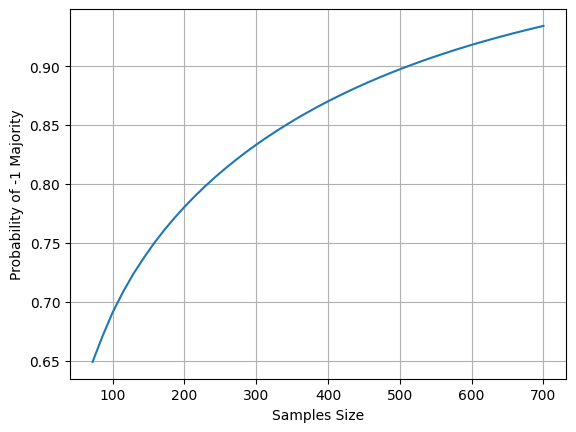

In [8]:
import matplotlib.pyplot as plt
plt.plot(x[5:], y[5:])
plt.grid()
plt.xlabel("Samples Size")
plt.ylabel("Probability of -1 Majority")